# GLM Final Project: Explanatory Modeling - Food Deserts and Diabetes Prevalence
By: Emily Donofrio

### Set up

In [2]:
# Import packages
import pandas as pd
from scipy.stats import pearsonr
from google.colab import files
import pyreadstat
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [3]:
# Set display options

# See all columns in dataframe
pd.set_option("display.max_columns", None)

# See up to 100 rows
pd.set_option("display.max_rows", 100)

# Set floats to show 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

### Read in data

In [4]:
# Read in datasets
fa_df = pd.read_excel("FoodAccessResearchAtlasData2019.xlsx", sheet_name = "Food Access Research Atlas")
diabetes = pd.read_csv("Diagnosed Diabetes Prevalence.csv")

In [5]:
fa_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.000000,0.000000,0,0,0,0,0,0,11.336453,81250.000000,1,1,1,1,1,0,0,0,1896.493338,1912.000004,1896.493338,460.998748,466.972228,460.998748,1912.000004,100.000000,466.972228,24.423234,507.000002,26.516736,221.000002,11.558578,1622.000008,84.832636,216.999999,11.349372,14.000000,0.732218,0.000000,0.000000,14.000000,0.732218,45.000000,2.353556,44.000000,2.301255,5.490446,0.792272,92.400001,13.333333,1896.493338,99.188982,460.998748,24.110813,503.506034,26.333998,218.674825,11.436968,1610.956368,84.255040,213.631073,11.173173,13.800985,0.721809,0.000000,0.000000,14.000000,0.732218,44.104914,2.306742,43.365253,2.268057,5.490446,0.792272,91.580907,13.215138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.000000,507.000000,221.000000,1622.000000,217.000000,14.000000,0.000000,14.000000,45.000000,44.000000,6.000000,102.000000
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.000000,8.341014,1,1,1,0,0,1,17.876788,49000.000000,1,1,1,1,1,0,0,0,1260.991651,2169.999998,1260.991651,603.892737,962.199453,603.892737,2169.999998,100.000000,962.199453,44.340989,606.000004,27.926267,214.000001,9.861751,888.000003,40.921659,1216.999994,56.082949,5.000000,0.230415,0.000000,0.000000,5.000000,0.230415,55.000001,2.534562,75.000001,3.456221,92.673554,12.472887,161.207233,21.696801,1260.991651,58.110214,603.892737,27.829158,405.660951,18.694053,126.604568,5.834312,356.617747,16.433998,854.189485,39.363571,4.000000,0.184332,0.000000,0.000000,4.396176,0.202589,41.788244,1.925726,32.980882,1.519856,66.903537,9.004514,96.208100,12.948600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802.000000,606.000000,214.000000,888.000000,1217.000000,5.000000,0.000000,5.000000,55.000000,75.000000,89.000000,156.000000
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.000000,0.000000,0,0,0,0,0,0,15.046030,62609.000000,1,1,1,1,1,0,0

In [6]:
fa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


In [7]:
diabetes.head()

,metro_nonmetro,year,county_name,state_abbr,geoId,value
0,Metropolitan,2004,Fairfield County,CT,us-ct-001,0.053000
1,Metropolitan,2004,Hartford County,CT,us-ct-003,0.067000
2,Metropolitan,2004,Middlesex County,CT,us-ct-007,0.056000
3,Metropolitan,2004,New Haven County,CT,us-ct-009,0.067000
4,Metropolitan,2004,New London County,CT,us-ct-011,0.066000


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56447 entries, 0 to 56446
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   metro_nonmetro  56447 non-null  object 
 1   year            56447 non-null  int64  
 2   county_name     56447 non-null  object 
 3   state_abbr      56447 non-null  object 
 4   geoId           56447 non-null  object 
 5   value           56447 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ MB


### Select only useful columns in Food Access data

In [9]:
cols = ['State', 'County', 'Urban', 'Pop2010',
        'LA1and10', 'PovertyRate', 'MedianFamilyIncome',
        'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack',
        'TractAsian', 'TractHispanic', 'TractSNAP']

In [10]:
food_access = fa_df[cols]

In [11]:
food_access.head()

,State,County,Urban,Pop2010,LA1and10,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractHispanic,TractSNAP
0,Alabama,Autauga County,1,1912,1,11.336453,81250.000000,507.000000,221.000000,1622.000000,217.000000,14.000000,44.000000,102.000000
1,Alabama,Autauga County,1,2170,1,17.876788,49000.000000,606.000000,214.000000,888.000000,1217.000000,5.000000,75.000000,156.000000
2,Alabama,Autauga County,1,3373,1,15.046030,62609.000000,894.000000,439.000000,2576.000000,647.000000,17.000000,87.000000,172.000000
3,Alabama,Autauga County,1,4386,1,2.845210,70607.000000,1015.000000,904.000000,4086.000000,193.000000,18.000000,85.000000,98.000000
4,Alabama,Autauga County,1,10766,1,15.150891,96334.000000,3162.000000,1126.000000,8666.000000,1437.000000,296.000000,355.000000,339.000000


In [12]:
food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               72531 non-null  object 
 1   County              72531 non-null  object 
 2   Urban               72531 non-null  int64  
 3   Pop2010             72531 non-null  int64  
 4   LA1and10            72531 non-null  int64  
 5   PovertyRate         72528 non-null  float64
 6   MedianFamilyIncome  71783 non-null  float64
 7   TractKids           72527 non-null  float64
 8   TractSeniors        72527 non-null  float64
 9   TractWhite          72527 non-null  float64
 10  TractBlack          72527 non-null  float64
 11  TractAsian          72527 non-null  float64
 12  TractHispanic       72527 non-null  float64
 13  TractSNAP           72527 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 7.7+ MB


### Aggregate to county/state level

In [13]:
# How many unique county/state combinations
counts = food_access.groupby(['State', 'County']).count()
counts.shape

# 3142 state/county combos for 72531 census tracts

(3142, 12)

In [14]:
# Create population weights by state county group
food_access['County_Pop'] = food_access.groupby(['State', 'County'])['Pop2010'].transform('sum')
food_access['Pop_Weight'] = food_access['Pop2010'] / food_access['County_Pop']

<ipython-input-14-295318bc3ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_access['County_Pop'] = food_access.groupby(['State', 'County'])['Pop2010'].transform('sum')
<ipython-input-14-295318bc3ce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_access['Pop_Weight'] = food_access['Pop2010'] / food_access['County_Pop']


In [15]:
# create weighted values of variables by county pop
cols_to_weight = ['Urban', 'LA1and10', 'PovertyRate', 'MedianFamilyIncome']

for col in cols_to_weight:
  new_col = col + '_weighted'
  food_access[new_col] = food_access[col] * food_access['Pop_Weight']


<ipython-input-15-481160d0733f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_access[new_col] = food_access[col] * food_access['Pop_Weight']
<ipython-input-15-481160d0733f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_access[new_col] = food_access[col] * food_access['Pop_Weight']
<ipython-input-15-481160d0733f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [16]:
food_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        72531 non-null  object 
 1   County                       72531 non-null  object 
 2   Urban                        72531 non-null  int64  
 3   Pop2010                      72531 non-null  int64  
 4   LA1and10                     72531 non-null  int64  
 5   PovertyRate                  72528 non-null  float64
 6   MedianFamilyIncome           71783 non-null  float64
 7   TractKids                    72527 non-null  float64
 8   TractSeniors                 72527 non-null  float64
 9   TractWhite                   72527 non-null  float64
 10  TractBlack                   72527 non-null  float64
 11  TractAsian                   72527 non-null  float64
 12  TractHispanic                72527 non-null  float64
 13  TractSNAP       

In [17]:
food_access.head()

,State,County,Urban,Pop2010,LA1and10,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractHispanic,TractSNAP,County_Pop,Pop_Weight,Urban_weighted,LA1and10_weighted,PovertyRate_weighted,MedianFamilyIncome_weighted
0,Alabama,Autauga County,1,1912,1,11.336453,81250.000000,507.000000,221.000000,1622.000000,217.000000,14.000000,44.000000,102.000000,54571,0.035037,0.035037,0.035037,0.397194,2846.750105
1,Alabama,Autauga County,1,2170,1,17.876788,49000.000000,606.000000,214.000000,888.000000,1217.000000,5.000000,75.000000,156.000000,54571,0.039765,0.039765,0.039765,0.710865,1948.470800
2,Alabama,Autauga County,1,3373,1,15.046030,62609.000000,894.000000,439.000000,2576.000000,647.000000,17.000000,87.000000,172.000000,54571,0.061809,0.061809,0.061809,0.929986,3869.823844
3,Alabama,Autauga County,1,4386,1,2.845210,70607.000000,1015.000000,904.000000,4086.000000,193.000000,18.000000,85.000000,98.000000,54571,0.080372,0.080372,0.080372,0.228676,5674.851148
4,Alabama,Autauga County,1,10766,1,15.150891,96334.000000,3162.000000,1126.000000,8666.000000,1437.000000,296.000000,355.000000,339.000000,54571,0.197284,0.197284,0.197284,2.989032,19005.183046


In [18]:
# Select columns to agg
cols_to_agg = ['Pop2010', 'Urban_weighted',	'LA1and10_weighted',	'PovertyRate_weighted',	'MedianFamilyIncome_weighted', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractHispanic', 'TractSNAP']
# Aggregate
county_fa = food_access.groupby(['State', 'County'])[cols_to_agg].sum()
county_fa.reset_index(inplace=True)
county_fa.head()

,State,County,Pop2010,Urban_weighted,LA1and10_weighted,PovertyRate_weighted,MedianFamilyIncome_weighted,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractHispanic,TractSNAP
0,Alabama,Autauga County,54571,0.534460,0.648330,15.139879,75759.553774,14613.000000,6546.000000,42855.000000,9643.000000,474.000000,1310.000000,2692.000000
1,Alabama,Baldwin County,182265,0.453976,0.451639,10.947043,73727.425885,41898.000000,30568.000000,156153.000000,17105.000000,1348.000000,7992.000000,5926.000000
2,Alabama,Barbour County,27457,0.241760,0.412172,29.341716,45025.706996,6015.000000,3909.000000,13180.000000,12875.000000,107.000000,1387.000000,2516.000000
3,Alabama,Bibb County,22915,0.000000,0.000000,13.855111,57929.822954,5201.000000,2906.000000,17381.000000,5047.000000,22.000000,406.000000,849.000000
4,Alabama,Blount County,57322,0.122989,0.122989,14.615919,60206.638812,14106.000000,8439.000000,53068.000000,761.000000,117.000000,4626.000000,1966.000000


In [19]:
# Rename tract column names
tract_cols_to_rename = [col for col in county_fa.columns if 'Tract' in col]

for col in tract_cols_to_rename:
  new_col = col.replace('Tract', 'County')
  county_fa.rename(columns={col: new_col}, inplace=True)

# Rename cols to remove _weighted
weighted_cols_to_rename = [col for col in county_fa.columns if '_weighted' in col]

for col in weighted_cols_to_rename:
  new_col = col.replace('_weighted', '')
  county_fa.rename(columns={col: new_col}, inplace=True)

county_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               3142 non-null   object 
 1   County              3142 non-null   object 
 2   Pop2010             3142 non-null   int64  
 3   Urban               3142 non-null   float64
 4   LA1and10            3142 non-null   float64
 5   PovertyRate         3142 non-null   float64
 6   MedianFamilyIncome  3142 non-null   float64
 7   CountyKids          3142 non-null   float64
 8   CountySeniors       3142 non-null   float64
 9   CountyWhite         3142 non-null   float64
 10  CountyBlack         3142 non-null   float64
 11  CountyAsian         3142 non-null   float64
 12  CountyHispanic      3142 non-null   float64
 13  CountySNAP          3142 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 343.8+ KB


In [20]:
# Create percentage columns
cols_to_percent = [col for col in county_fa.columns if 'County' in col and col not in ['County']]

for col in cols_to_percent:
  new_col = col + '_percent'
  county_fa[new_col] = county_fa[col] / county_fa['Pop2010']

In [21]:
county_fa.head()

,State,County,Pop2010,Urban,LA1and10,PovertyRate,MedianFamilyIncome,CountyKids,CountySeniors,CountyWhite,CountyBlack,CountyAsian,CountyHispanic,CountySNAP,CountyKids_percent,CountySeniors_percent,CountyWhite_percent,CountyBlack_percent,CountyAsian_percent,CountyHispanic_percent,CountySNAP_percent
0,Alabama,Autauga County,54571,0.534460,0.648330,15.139879,75759.553774,14613.000000,6546.000000,42855.000000,9643.000000,474.000000,1310.000000,2692.000000,0.267780,0.119954,0.785307,0.176706,0.008686,0.024005,0.049330
1,Alabama,Baldwin County,182265,0.453976,0.451639,10.947043,73727.425885,41898.000000,30568.000000,156153.000000,17105.000000,1348.000000,7992.000000,5926.000000,0.229874,0.167712,0.856736,0.093847,0.007396,0.043848,0.032513
2,Alabama,Barbour County,27457,0.241760,0.412172,29.341716,45025.706996,6015.000000,3909.000000,13180.000000,12875.000000,107.000000,1387.000000,2516.000000,0.219070,0.142368,0.480023,0.468915,0.003897,0.050515,0.091634
3,Alabama,Bibb County,22915,0.000000,0.000000,13.855111,57929.822954,5201.000000,2906.000000,17381.000000,5047.000000,22.000000,406.000000,849.000000,0.226969,0.126816,0.758499,0.220249,0.000960,0.017718,0.037050
4,Alabama,Blount County,57322,0.122989,0.122989,14.615919,60206.638812,14106.000000,8439.000000,53068.000000,761.000000,117.000000,4626.000000,1966.000000,0.246084,0.147221,0.925788,0.013276,0.002041,0.080702,0.034297


### Clean Diabetes data

In [22]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56447 entries, 0 to 56446
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   metro_nonmetro  56447 non-null  object 
 1   year            56447 non-null  int64  
 2   county_name     56447 non-null  object 
 3   state_abbr      56447 non-null  object 
 4   geoId           56447 non-null  object 
 5   value           56447 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ MB


In [23]:
# Select only 2019 data
diabetes = diabetes[diabetes['year'] == 2019]
diabetes.shape

(3120, 6)

In [24]:
# Select conly county state and diabetes prevalence
diabetes = diabetes[['state_abbr', 'county_name', 'value']]

# Rename diabetes prevalence column
diabetes.rename(columns={'value': 'diabetes_prevalence'}, inplace=True)
diabetes.head()

,state_abbr,county_name,diabetes_prevalence
16801,CT,Fairfield County,0.075000
16802,CT,Hartford County,0.094000
16803,CT,Middlesex County,0.082000
16804,CT,New Haven County,0.106000
16805,CT,New London County,0.092000


### Join food access and diabetes data on state and county

In [25]:
# Dictionary to convert State to state abbreviation
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [26]:
county_fa['State'] = county_fa['State'].map(us_state_to_abbrev)
county_fa['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [27]:
# Things I learned from investigating mismatches
diabetes['county_name'] = diabetes['county_name'].str.upper()
county_fa['County'] = county_fa['County'].str.upper()
diabetes['county_name'] = diabetes['county_name'].str.replace("'", '')
county_fa['County'] = county_fa['County'].str.replace("'", '')
county_fa.loc[county_fa['County'] == 'DOÃ±A ANA COUNTY', 'County'] = 'DONA ANA COUNTY'
diabetes.loc[diabetes['county_name'] == 'PRINCE OF WALES-HYDER CENSU', 'county_name'] = 'PRINCE OF WALES-HYDER CENSUS AREA'
diabetes.loc[diabetes['county_name'] == 'PETERSBURG CENSUS AREA', 'county_name'] = 'PETERSBURG BOROUGH'

In [28]:
# Inner join on state and county
print("Food Access length:", len(county_fa))
print("Diabetes length:", len(diabetes))
fa_diabetes = pd.merge(county_fa, diabetes, left_on=['State', 'County'], right_on=['state_abbr', 'county_name'], how='inner')
print("Combined length:", len(fa_diabetes))

Food Access length: 3142
Diabetes length: 3120
Combined length: 3120


In [29]:
fa_diabetes.head()

,State,County,Pop2010,Urban,LA1and10,PovertyRate,MedianFamilyIncome,CountyKids,CountySeniors,CountyWhite,CountyBlack,CountyAsian,CountyHispanic,CountySNAP,CountyKids_percent,CountySeniors_percent,CountyWhite_percent,CountyBlack_percent,CountyAsian_percent,CountyHispanic_percent,CountySNAP_percent,state_abbr,county_name,diabetes_prevalence
0,AL,AUTAUGA COUNTY,54571,0.534460,0.648330,15.139879,75759.553774,14613.000000,6546.000000,42855.000000,9643.000000,474.000000,1310.000000,2692.000000,0.267780,0.119954,0.785307,0.176706,0.008686,0.024005,0.049330,AL,AUTAUGA COUNTY,0.109001
1,AL,BALDWIN COUNTY,182265,0.453976,0.451639,10.947043,73727.425885,41898.000000,30568.000000,156153.000000,17105.000000,1348.000000,7992.000000,5926.000000,0.229874,0.167712,0.856736,0.093847,0.007396,0.043848,0.032513,AL,BALDWIN COUNTY,0.099000
2,AL,BARBOUR COUNTY,27457,0.241760,0.412172,29.341716,45025.706996,6015.000000,3909.000000,13180.000000,12875.000000,107.000000,1387.000000,2516.000000,0.219070,0.142368,0.480023,0.468915,0.003897,0.050515,0.091634,AL,BARBOUR COUNTY,0.134006
3,AL,BIBB COUNTY,22915,0.000000,0.000000,13.855111,57929.822954,5201.000000,2906.000000,17381.000000,5047.000000,22.000000,406.000000,849.000000,0.226969,0.126816,0.758499,0.220249,0.000960,0.017718,0.037050,AL,BIBB COUNTY,0.115003
4,AL,BLOUNT COUNTY,57322,0.122989,0.122989,14.615919,60206.638812,14106.000000,8439.000000,53068.000000,761.000000,117.000000,4626.000000,1966.000000,0.246084,0.147221,0.925788,0.013276,0.002041,0.080702,0.034297,AL,BLOUNT COUNTY,0.115003


### Investigate non-matches

In [30]:
# Outer merge
fa_diabetes_outer = pd.merge(county_fa, diabetes, left_on=['State', 'County'], right_on=['state_abbr', 'county_name'], how='outer', indicator=True)
fa_diabetes_outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   3142 non-null   object  
 1   County                  3142 non-null   object  
 2   Pop2010                 3142 non-null   int64   
 3   Urban                   3142 non-null   float64 
 4   LA1and10                3142 non-null   float64 
 5   PovertyRate             3142 non-null   float64 
 6   MedianFamilyIncome      3142 non-null   float64 
 7   CountyKids              3142 non-null   float64 
 8   CountySeniors           3142 non-null   float64 
 9   CountyWhite             3142 non-null   float64 
 10  CountyBlack             3142 non-null   float64 
 11  CountyAsian             3142 non-null   float64 
 12  CountyHispanic          3142 non-null   float64 
 13  CountySNAP              3142 non-null   float64 
 14  CountyKids_percent      

In [31]:
fa_diabetes_outer['_merge'].value_counts()

,count
_merge,
both,3120
left_only,22
right_only,0


In [32]:
fa_diabetes_outer[fa_diabetes_outer['_merge'] != 'both']

,State,County,Pop2010,Urban,LA1and10,PovertyRate,MedianFamilyIncome,CountyKids,CountySeniors,CountyWhite,CountyBlack,CountyAsian,CountyHispanic,CountySNAP,CountyKids_percent,CountySeniors_percent,CountyWhite_percent,CountyBlack_percent,CountyAsian_percent,CountyHispanic_percent,CountySNAP_percent,state_abbr,county_name,diabetes_prevalence,_merge
1910,NJ,ATLANTIC COUNTY,274549,0.790708,0.471460,14.182659,75109.022812,63888.000000,38902.000000,179566.000000,44138.000000,20595.000000,46241.000000,13976.000000,0.232702,0.141694,0.654040,0.160765,0.075014,0.168425,0.050905,NaN,NaN,NaN,left_only
1911,NJ,BERGEN COUNTY,905116,0.994610,0.239327,6.999134,122549.425349,204405.000000,137103.000000,650703.000000,52473.000000,131329.000000,145281.000000,17113.000000,0.225833,0.151476,0.718917,0.057974,0.145096,0.160511,0.018907,NaN,NaN,NaN,left_only
1912,NJ,BURLINGTON COUNTY,448734,0.872410,0.594428,6.602866,106729.393070,104243.000000,62190.000000,331342.000000,74505.000000,19395.000000,28831.000000,8981.000000,0.232305,0.138590,0.738393,0.166034,0.043222,0.064250,0.020014,NaN,NaN,NaN,left_only
1913,NJ,CAMDEN COUNTY,513657,0.979389,0.422338,12.711964,87569.168206,125117.000000,65725.000000,335389.000000,100441.000000,26257.000000,73124.000000,22427.000000,0.243581,0.127955,0.652944,0.195541,0.051118,0.142360,0.043661,NaN,NaN,NaN,left_only
1914,NJ,CAPE MAY COUNTY,97265,0.707490,0.573074,10.956593,80529.333193,18349.000000,20977.000000,87369.000000,4565.000000,834.000000,6054.000000,2723.000000,0.188650,0.215669,0.898257,0.046934,0.008575,0.062242,0.027996,NaN,NaN,NaN,left_only
1915,NJ,CUMBERLAND COUNTY,156898,0.791839,0.546565,17.866525,59624.789080,37705.000000,19795.000000,98430.000000,31741.000000,1907.000000,42457.000000,8709.000000,0.240315,0.126165,0.627350,0.202303,0.012154,0.270603,0.055507,NaN,NaN,NaN,left_only
1916,NJ,ESSEX COUNTY,783969,1.000000,0.176047,16.570137,89407.516571,194918.000000,90287.000000,333868.000000,320479.000000,35789.000000,159117.000000,42719.000000,0.248630,0.115167,0.425869,0.408790,0.045651,0.202963,0.054491,NaN,NaN,NaN,left_only
1917,NJ,GLOUCESTER COUNTY,288288,0.876721,0.691971,7.655605,102750.612124,70261.000000,35699.000000,240890.000000,29006.000000,7609.000000,13712.000000,8506.000000,0.243718,0.123831,0.835588,0.100615,0.026394,0.047564,0.029505,NaN,NaN,NaN,left_only
1918,NJ,HUDSON COUNTY,634266,1.000000,0.018715,16.470526,81654.497766,131162.000000,66066.000000,342792.000000,83925.000000,84924.000000,267853.000000,39728.000000,0.206793,0.104161,0.540455,0.132318,0.133893,0.422304,0.062636,NaN,NaN,NaN,left_only
1919,NJ,HUNTERDON COUNTY,128349,0.365706,0.308830,4.736961,141445.198934,30217.000000,16344.000000,117264.000000,3451.000000,4181.000000,6722.000000,1607.000000,0.235428,0.127340,0.913634,0.026888,0.032575,0.052373,0.012521,NaN,NaN,NaN,left_only


Almost all of the counties that are in the food access dataset and not the diabetes dataset are in New Jersey

In [33]:
# Check how many counties per state
fa_diabetes['State'].value_counts()

,count
State,
TX,253
GA,159
VA,133
KY,120
MO,115
KS,105
IL,102
NC,100
IA,99


There are no counties in New Jersey in the merged dataset which tells me that diabetes data was not collected or included in this dataset for New Jersey.

### EDA on the variables of interest

In [34]:
fa_diabetes.isna().sum()
# No missing data except for the omission of New Jersey no matches

,0
State,0
County,0
Pop2010,0
Urban,0
LA1and10,0
PovertyRate,0
MedianFamilyIncome,0
CountyKids,0
CountySeniors,0
CountyWhite,0


In [35]:
fa_diabetes.describe()

,Pop2010,Urban,LA1and10,PovertyRate,MedianFamilyIncome,CountyKids,CountySeniors,CountyWhite,CountyBlack,CountyAsian,CountyHispanic,CountySNAP,CountyKids_percent,CountySeniors_percent,CountyWhite_percent,CountyBlack_percent,CountyAsian_percent,CountyHispanic_percent,CountySNAP_percent,diabetes_prevalence
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,96138.962179,0.361174,0.461357,15.742775,63953.088276,23111.474679,12525.889744,69719.023718,12091.182051,4470.671154,15680.168910,4596.945833,0.233983,0.158920,0.829519,0.088607,0.011237,0.082337,0.050488,0.105714
std,312280.444265,0.318777,0.286723,6.490317,15846.946622,76979.856185,36299.760057,186943.467612,54211.579375,35718.258316,115785.351628,14686.127273,0.034023,0.042062,0.168667,0.145295,0.024402,0.131978,0.023004,0.019213
min,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
25%,11053.250000,0.000000,0.265062,11.077747,53550.130417,2549.750000,1846.250000,8998.000000,74.000000,32.000000,257.500000,518.500000,0.214172,0.131371,0.754437,0.004471,0.002782,0.015854,0.034075,0.093001
50%,25597.000000,0.343851,0.451994,14.889279,61920.014159,6042.500000,3923.000000,21464.500000,716.000000,117.000000,881.500000,1352.500000,0.233134,0.155814,0.891260,0.019756,0.004723,0.032488,0.048183,0.103009
75%,65367.500000,0.612360,0.624802,19.174865,71318.395707,15145.000000,9508.750000,54859.000000,5262.750000,605.500000,4089.250000,3357.000000,0.251129,0.182152,0.955530,0.099860,0.009875,0.080777,0.063842,0.117000
max,9818605.000000,1.000000,1.000000,55.328390,176643.464564,2402208.000000,1065699.000000,4936599.000000,1287767.000000,1346865.000000,4687889.000000,296761.000000,0.401269,0.433847,0.992191,0.856847,0.438950,0.957448,0.166772,0.202006


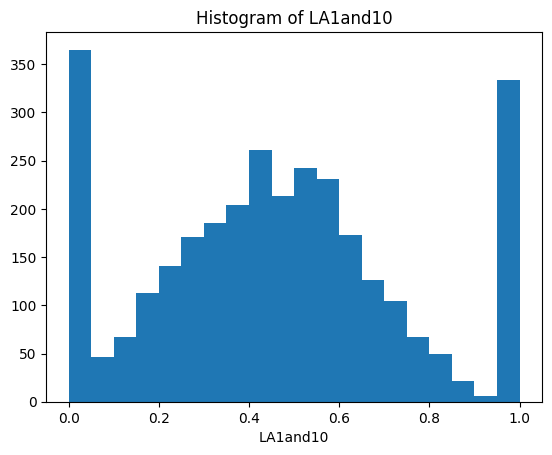

In [36]:
# histogram of LA1and10
plt.hist(fa_diabetes['LA1and10'], bins=20)
plt.title('Histogram of LA1and10')
plt.xlabel('LA1and10')
plt.show()
# modes at 0 and one, otherwise seminormal but wide

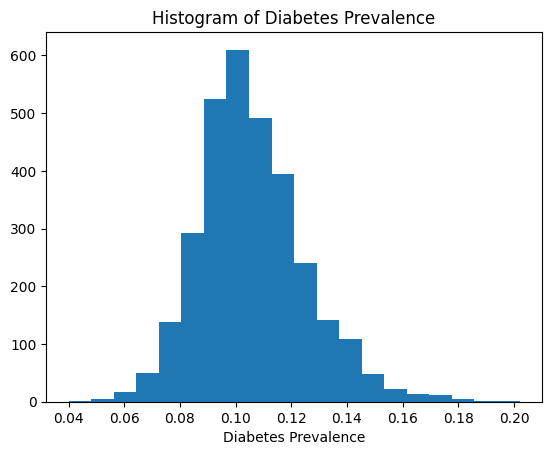

In [37]:
# histogram of diabetes prevalence
plt.hist(fa_diabetes['diabetes_prevalence'], bins = 20)
plt.title('Histogram of Diabetes Prevalence')
plt.xlabel('Diabetes Prevalence')
plt.show()
# Fairly normal

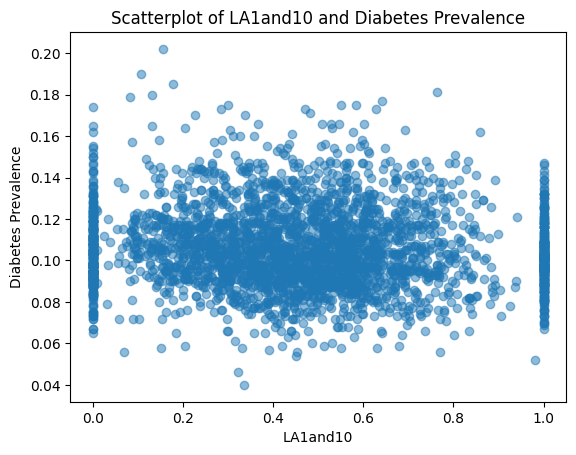

In [38]:
# Scatter plot of LA1and10 and diabetes prevalence
plt.scatter(fa_diabetes['LA1and10'], fa_diabetes['diabetes_prevalence'], alpha=0.5)
plt.title('Scatterplot of LA1and10 and Diabetes Prevalence')
plt.xlabel('LA1and10')
plt.ylabel('Diabetes Prevalence')
plt.show()

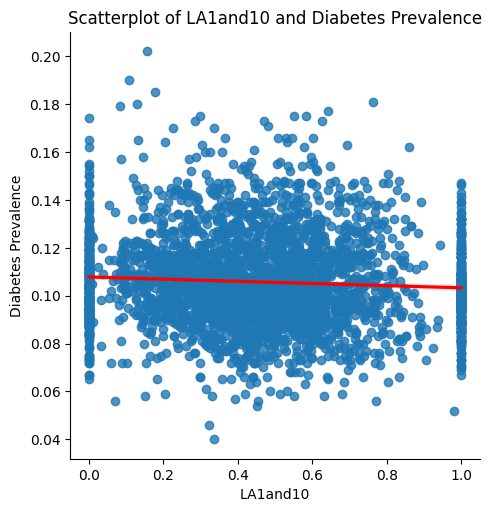

In [39]:
# Scatter plot of LA1and10 and diabetes prevalence with regression line
sns.lmplot(x='LA1and10', y='diabetes_prevalence', data=fa_diabetes, line_kws={'color':'red'})
plt.title('Scatterplot of LA1and10 and Diabetes Prevalence')
plt.xlabel('LA1and10')
plt.ylabel('Diabetes Prevalence')
plt.show()

In [40]:
# get correlation coefficient and p-value for LA1and10 and diabetes prevalence
corr_coef = pearsonr(fa_diabetes['LA1and10'], fa_diabetes['diabetes_prevalence'])
print("Correlation coefficient:", corr_coef[0])
print("p-value:", corr_coef[1])

Correlation coefficient: -0.06758061392254625
p-value: 0.00015831250664356084


In [41]:
fa_diabetes.columns

Index(['State', 'County', 'Pop2010', 'Urban', 'LA1and10', 'PovertyRate',
       'MedianFamilyIncome', 'CountyKids', 'CountySeniors', 'CountyWhite',
       'CountyBlack', 'CountyAsian', 'CountyHispanic', 'CountySNAP',
       'CountyKids_percent', 'CountySeniors_percent', 'CountyWhite_percent',
       'CountyBlack_percent', 'CountyAsian_percent', 'CountyHispanic_percent',
       'CountySNAP_percent', 'state_abbr', 'county_name',
       'diabetes_prevalence'],
      dtype='object')

In [42]:
# correlation matrix of interesting columns
cols_to_corr = ['LA1and10', 'diabetes_prevalence', 'Pop2010', 'Urban', 'PovertyRate', 'MedianFamilyIncome', 'CountyKids_percent',	'CountySeniors_percent',	'CountyWhite_percent',	'CountyBlack_percent',	'CountyAsian_percent',	'CountyHispanic_percent',	'CountySNAP_percent']
def bivar_corr(df):
  """
      Takes in a dataframe. Calculates correlation matrix and creates annotated
      matrix with significance indicators.

      Input: df: pd.DataFrame
      Returns: corr_matrix, annot_matrix: Tuple of dataframes
      """

  # Calculate correlation matrix
  corr_matrix = df.corr()
  cols = df.columns

  # Calculate p-values
  p_values = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

  for row in cols:
      for col in cols:
          _, p = pearsonr(df[row], df[col])
          p_values.loc[row, col] = p

  # Create a mask for significant correlations (p < 0.01)
  sig_mask01 = p_values < 0.01
  sig_mask05 = p_values < 0.05

  # Annotate significant correlations in the correlation matrix
  annot_matrix = corr_matrix.round(2).astype(str)
  for row in cols:
      for col in cols:
          if sig_mask05.loc[row, col] and row!=col:
              annot_matrix.loc[row, col] += '*'
              if sig_mask01.loc[row, col] and row!=col:
                annot_matrix.loc[row, col] += '*'
  return corr_matrix, annot_matrix

# Display the annotated correlation matrix
corr_matrix, annot_matrix = bivar_corr(fa_diabetes[cols_to_corr])
print("Bivariate Correlations")
print(annot_matrix)
print("** p_values < 0.01, * p_values < 0.05")

Bivariate Correlations
                       LA1and10 diabetes_prevalence  Pop2010    Urban  \
LA1and10                    1.0             -0.07**   -0.05*   0.21**   
diabetes_prevalence     -0.07**                 1.0  -0.07**  -0.14**   
Pop2010                  -0.05*             -0.07**      1.0   0.39**   
Urban                    0.21**             -0.14**   0.39**      1.0   
PovertyRate             -0.07**              0.31**  -0.06**  -0.08**   
MedianFamilyIncome       0.05**             -0.41**   0.27**   0.38**   
CountyKids_percent       0.09**             -0.07**   0.06**   0.15**   
CountySeniors_percent     0.04*              0.21**  -0.21**  -0.42**   
CountyWhite_percent     -0.05**             -0.24**  -0.19**  -0.19**   
CountyBlack_percent       -0.01              0.34**   0.08**    0.1**   
CountyAsian_percent       -0.01             -0.17**   0.45**   0.41**   
CountyHispanic_percent   0.12**             -0.25**   0.19**   0.24**   
CountySNAP_percent      -0.1

### Start with simple linear regression

In [43]:
# Fit model
model1 = ols('diabetes_prevalence ~ LA1and10', data=fa_diabetes).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     14.31
Date:                 Wed, 09 Apr 2025   Prob (F-statistic):           0.000158
Time:                         00:15:15   Log-Likelihood:                 7911.3
No. Observations:                 3120   AIC:                        -1.582e+04
Df Residuals:                     3118   BIC:                        -1.581e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1078      0.001    165.76

In [44]:
# Model with all interesting variables

# Define dependent variable
y = fa_diabetes['diabetes_prevalence']

# Define independent variables
x_vars = [col for col in cols_to_corr if col != 'diabetes_prevalence']
X1 = fa_diabetes[x_vars]

# Add constants to independent variables for intercept term
X1 = sm.add_constant(X1)

# Fit regression models
model2 = sm.OLS(y, X1).fit()

print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     diabetes_prevalence   R-squared:                       0.361
Model:                             OLS   Adj. R-squared:                  0.359
Method:                  Least Squares   F-statistic:                     146.3
Date:                 Wed, 09 Apr 2025   Prob (F-statistic):          2.51e-291
Time:                         00:15:15   Log-Likelihood:                 8603.1
No. Observations:                 3120   AIC:                        -1.718e+04
Df Residuals:                     3107   BIC:                        -1.710e+04
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

### Check for multicollinearity

In [45]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term (first row)
vif_data = vif_data.drop(0)

# Print the result
print("Tolerance and VIF values:")
print(vif_data)

Tolerance and VIF values:
                   Feature      VIF  Tolerance
1                 LA1and10 1.221952   0.818363
2                  Pop2010 1.387205   0.720874
3                    Urban 1.793305   0.557630
4              PovertyRate 3.565685   0.280451
5       MedianFamilyIncome 3.567529   0.280306
6       CountyKids_percent 1.579989   0.632916
7    CountySeniors_percent 2.068013   0.483556
8      CountyWhite_percent 4.561658   0.219219
9      CountyBlack_percent 3.735899   0.267673
10     CountyAsian_percent 1.933537   0.517187
11  CountyHispanic_percent 1.381866   0.723659
12      CountySNAP_percent 2.692085   0.371459


None of the features have a VIF > than 5 or a tolerance < 0.2, so multicollinearity does not appear to be a major concern. The variable of interest, LA1and10 has a VIF of 1.22 and a tolerance of 0.8183 meaning that 81% of its variance is independent of the other variables. This is surprising to me.

<Axes: >

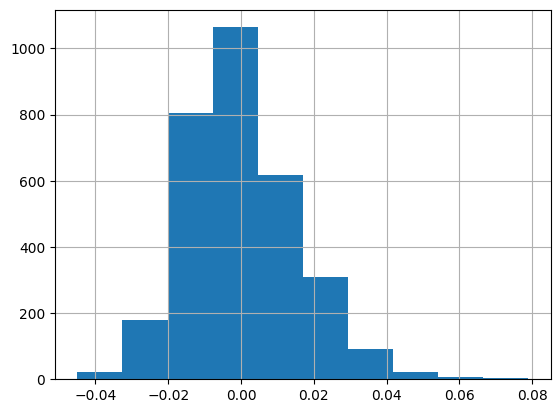

In [46]:
fa_diabetes['residuals'] = model2.resid
fa_diabetes['residuals'].hist()

In [47]:
# plot the residuals
# Sum of squared residuals (SSR)
SSR = np.sum((fa_diabetes['residuals']) ** 2)

n = model2.nobs # Number of observations and number of predictors
k = model2.df_model  # Number of predictors (excluding intercept)

# Mean square of residuals
MS_residual = SSR / (n - k - 1)

# Standard deviation of residuals
S_residual = np.sqrt(MS_residual)

# Now use S_residual to standardize residuals
fa_diabetes['standardized_residuals'] = fa_diabetes['residuals'] / S_residual

<ipython-input-51-66d751f7de92>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = standardized_resid_regline.params[1]
<ipython-input-51-66d751f7de92>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = standardized_resid_regline.params[0]


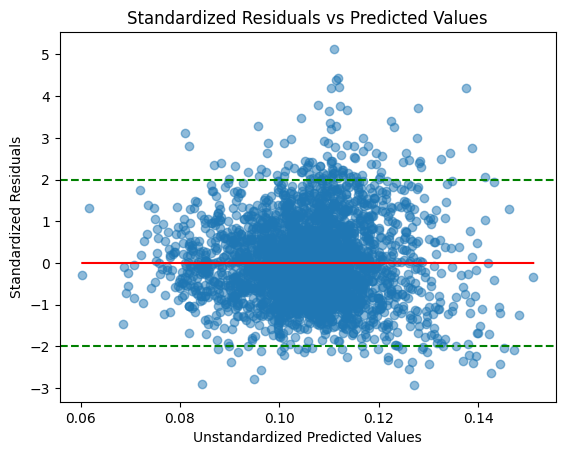

In [51]:
# Stabdardized residuals vs predicted values

fa_diabetes['predicted'] = model2.predict(X1)
# Sort the data by predicted values
sorted_fa_diabetes = fa_diabetes.sort_values(by='predicted')

plt.scatter(fa_diabetes['predicted'], fa_diabetes['standardized_residuals'], alpha=0.5)


# Set reference lines
plt.axhline(y=2, color='green', linestyle='--')
plt.axhline(y=-2, color='green', linestyle='--')

# Plot regression line
standardized_resid_regline = sm.OLS(sorted_fa_diabetes['standardized_residuals'], sm.add_constant(sorted_fa_diabetes['predicted'])).fit()
slope = standardized_resid_regline.params[1]
intercept = standardized_resid_regline.params[0]
plt.plot(sorted_fa_diabetes['predicted'], intercept + slope * sorted_fa_diabetes['predicted'], color = 'red')

# Identify outliers to annotate
standardized_resid_outliers = fa_diabetes[(fa_diabetes['standardized_residuals'] > 2) | (fa_diabetes['standardized_residuals'] < -2)]

# Annotate the outliers
#for idx, row in standardized_resid_outliers.iterrows():
#    plt.annotate(idx,
 #                (row['predicted'], row['standardized_residuals']), color='red', fontsize=12, ha='left')

plt.title("Standardized Residuals vs Predicted Values")
plt.xlabel("Unstandardized Predicted Values")
plt.ylabel("Standardized Residuals")
plt.show()

In [52]:
fa_diabetes[fa_diabetes['standardized_residuals']>5]

,State,County,Pop2010,Urban,LA1and10,PovertyRate,MedianFamilyIncome,CountyKids,CountySeniors,CountyWhite,CountyBlack,CountyAsian,CountyHispanic,CountySNAP,CountyKids_percent,CountySeniors_percent,CountyWhite_percent,CountyBlack_percent,CountyAsian_percent,CountyHispanic_percent,CountySNAP_percent,state_abbr,county_name,diabetes_prevalence,residuals,standardized_residuals,predicted
2992,WV,LOGAN COUNTY,36743,0.106714,0.106714,23.276085,48079.782598,7494.000000,5575.000000,35475.000000,788.000000,101.000000,258.000000,3348.000000,0.203957,0.151730,0.965490,0.021446,0.002749,0.007022,0.091119,WV,LOGAN COUNTY,0.190000,0.078960,5.131721,0.111040


### Check relationships prior to aggregation - did they change?

In [ ]:
# Create % of population variables as census tract level
cols_to_percent = [col for col in food_access.columns if 'Tract' in col]

for col in cols_to_percent:
  new_col = col + '_percent'
  food_access[new_col] = food_access[col] / food_access['Pop2010']

<ipython-input-46-bae32d0a04c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_access[new_col] = food_access[col] / food_access['Pop2010']
<ipython-input-46-bae32d0a04c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_access[new_col] = food_access[col] / food_access['Pop2010']
<ipython-input-46-bae32d0a04c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
food_access.columns

Index(['State', 'County', 'Urban', 'Pop2010', 'LA1and10', 'PovertyRate',
       'MedianFamilyIncome', 'TractKids', 'TractSeniors', 'TractWhite',
       'TractBlack', 'TractAsian', 'TractHispanic', 'TractSNAP', 'County_Pop',
       'Pop_Weight', 'Urban_weighted', 'LA1and10_weighted',
       'PovertyRate_weighted', 'MedianFamilyIncome_weighted',
       'TractKids_percent', 'TractSeniors_percent', 'TractWhite_percent',
       'TractBlack_percent', 'TractAsian_percent', 'TractHispanic_percent',
       'TractSNAP_percent'],
      dtype='object')

In [ ]:
# Display the annotated correlation matrix
cols_to_corr2 = ['LA1and10', 'Pop2010', 'Urban', 'PovertyRate', 'MedianFamilyIncome', 'TractKids_percent',	'TractSeniors_percent',	'TractWhite_percent',	'TractBlack_percent',	'TractAsian_percent',	'TractHispanic_percent',	'TractSNAP_percent']
corr_matrix, annot_matrix = bivar_corr(food_access[cols_to_corr2])
print("Bivariate Correlations")
print(annot_matrix)
print("** p_values < 0.01, * p_values < 0.05")

Bivariate Correlations
                      LA1and10 Pop2010   Urban PovertyRate MedianFamilyIncome  \
LA1and10                   1.0  0.18**  0.23**       -0.13               0.11   
Pop2010                 0.18**     1.0  0.05**       -0.14               0.11   
Urban                   0.23**  0.05**     1.0        0.09                0.1   
PovertyRate              -0.13   -0.14    0.09         1.0              -0.66   
MedianFamilyIncome        0.11    0.11     0.1       -0.66                1.0   
TractKids_percent         0.08    0.21    0.01        0.12              -0.17   
TractSeniors_percent      0.05   -0.17   -0.14       -0.19               0.05   
TractWhite_percent        0.12    0.05   -0.31       -0.47               0.32   
TractBlack_percent       -0.04   -0.12    0.18        0.44              -0.33   
TractAsian_percent       -0.08    0.09    0.23       -0.11               0.26   
TractHispanic_percent    -0.14    0.11    0.23        0.24              -0.25   
Tract

Food desert indicator LA1and10 is correlated with urban indicator which makes sense, this relationship is similar aggregated and not aggregated. The unaggregated dataset in general has much fewer significant bivariate correlation coefficients than the aggregated dataset.


### Get aggregation example for slides

In [ ]:
food_access[food_access['State'] == 'Massachusetts']['County'].value_counts()

,count
County,
Middlesex County,317
Suffolk County,200
Worcester County,172
Essex County,162
Norfolk County,130
Bristol County,125
Hampden County,103
Plymouth County,100
Barnstable County,56


In [ ]:
food_access[food_access['County'] == 'Nantucket County']

,State,County,Urban,Pop2010,LA1and10,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractHispanic,TractSNAP,County_Pop,Pop_Weight,Urban_weighted,LA1and10_weighted,PovertyRate_weighted,MedianFamilyIncome_weighted,TractKids_percent,TractSeniors_percent,TractWhite_percent,TractBlack_percent,TractAsian_percent,TractHispanic_percent,TractSNAP_percent
31847,Massachusetts,Nantucket County,1,1375,0,13.733906,128060.000000,150.000000,360.000000,1296.000000,43.000000,14.000000,30.000000,12.000000,10172,0.135175,0.135175,0.000000,1.856481,17310.509241,0.109091,0.261818,0.942545,0.031273,0.010182,0.021818,0.008727
31848,Massachusetts,Nantucket County,1,4869,0,9.335382,116447.000000,1108.000000,389.000000,4015.000000,472.000000,72.000000,602.000000,112.000000,10172,0.478667,0.478667,0.000000,4.468539,55739.327861,0.227562,0.079893,0.824605,0.096940,0.014787,0.123639,0.023003
31849,Massachusetts,Nantucket County,0,342,0,7.768924,64899.000000,63.000000,90.000000,331.000000,1.000000,2.000000,4.000000,0.000000,10172,0.033622,0.000000,0.000000,0.261204,2182.015140,0.184211,0.263158,0.967836,0.002924,0.005848,0.011696,0.000000
31850,Massachusetts,Nantucket County,1,2422,1,5.985037,124073.000000,583.000000,134.000000,2151.000000,152.000000,27.000000,302.000000,0.000000,10172,0.238105,0.238105,0.238105,1.425065,29542.352143,0.240710,0.055326,0.888109,0.062758,0.011148,0.124690,0.000000
31851,Massachusetts,Nantucket County,0,1164,0,5.730129,110625.000000,204.000000,254.000000,1120.000000,20.000000,3.000000,19.000000,11.000000,10172,0.114432,0.000000,0.000000,0.655709,12659.014943,0.175258,0.218213,0.962199,0.017182,0.002577,0.016323,0.009450


In [ ]:
county_fa[county_fa['County'] == 'NANTUCKET COUNTY']

,State,County,Pop2010,Urban,LA1and10,PovertyRate,MedianFamilyIncome,CountyKids,CountySeniors,CountyWhite,CountyBlack,CountyAsian,CountyHispanic,CountySNAP,CountyKids_percent,CountySeniors_percent,CountyWhite_percent,CountyBlack_percent,CountyAsian_percent,CountyHispanic_percent,CountySNAP_percent
1226,MA,NANTUCKET COUNTY,10172,0.851947,0.238105,8.666998,117433.219328,2108.000000,1227.000000,8913.000000,688.000000,118.000000,957.000000,135.000000,0.207236,0.120625,0.876229,0.067637,0.011600,0.094082,0.013272


### Scatterplot of SNAP percent and diabetes prevalence

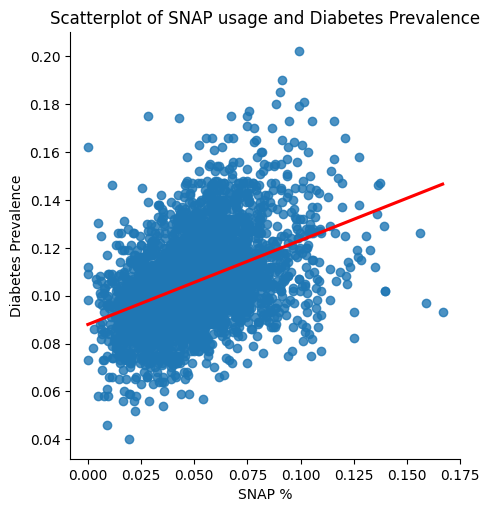

In [ ]:
# Scatter plot of LA1and10 and diabetes prevalence with regression line
sns.lmplot(x='CountySNAP_percent', y='diabetes_prevalence', data=fa_diabetes, line_kws={'color':'red'}, ci=False)
plt.title('Scatterplot of SNAP usage and Diabetes Prevalence')
plt.xlabel('SNAP %')
plt.ylabel('Diabetes Prevalence')
plt.show()